# STA365 Homework 1

### Question 1

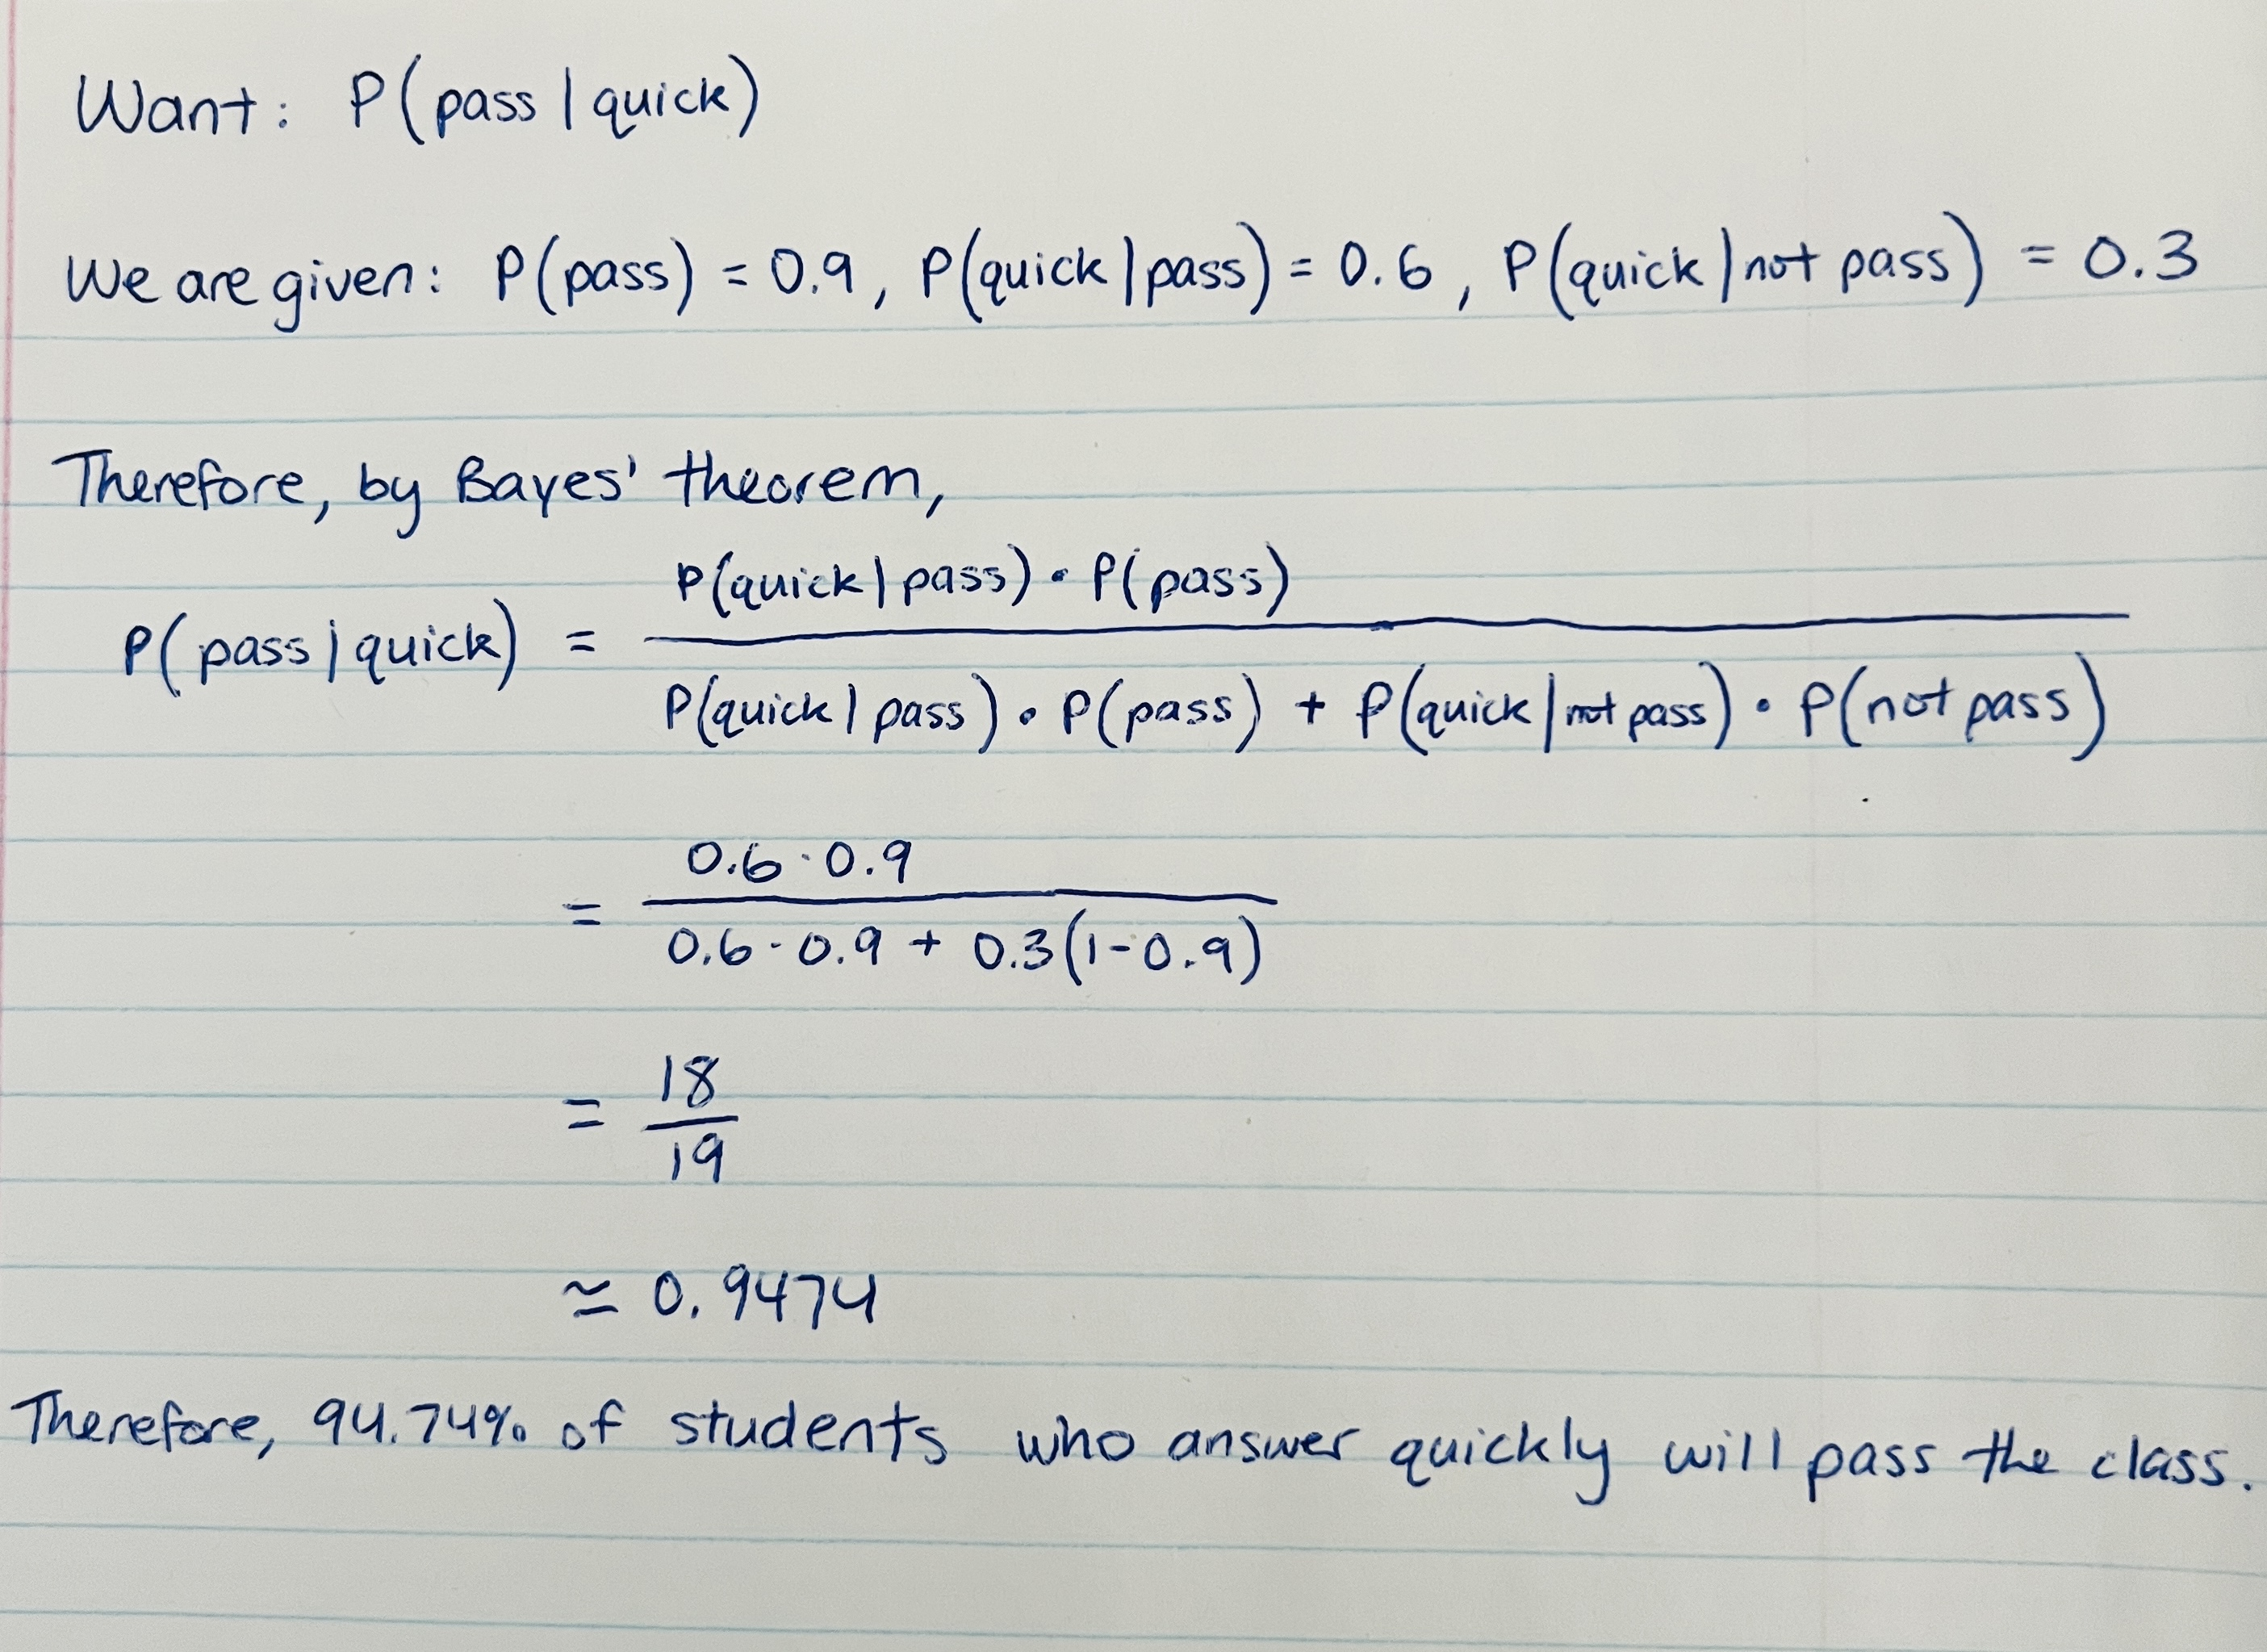

### Question 2

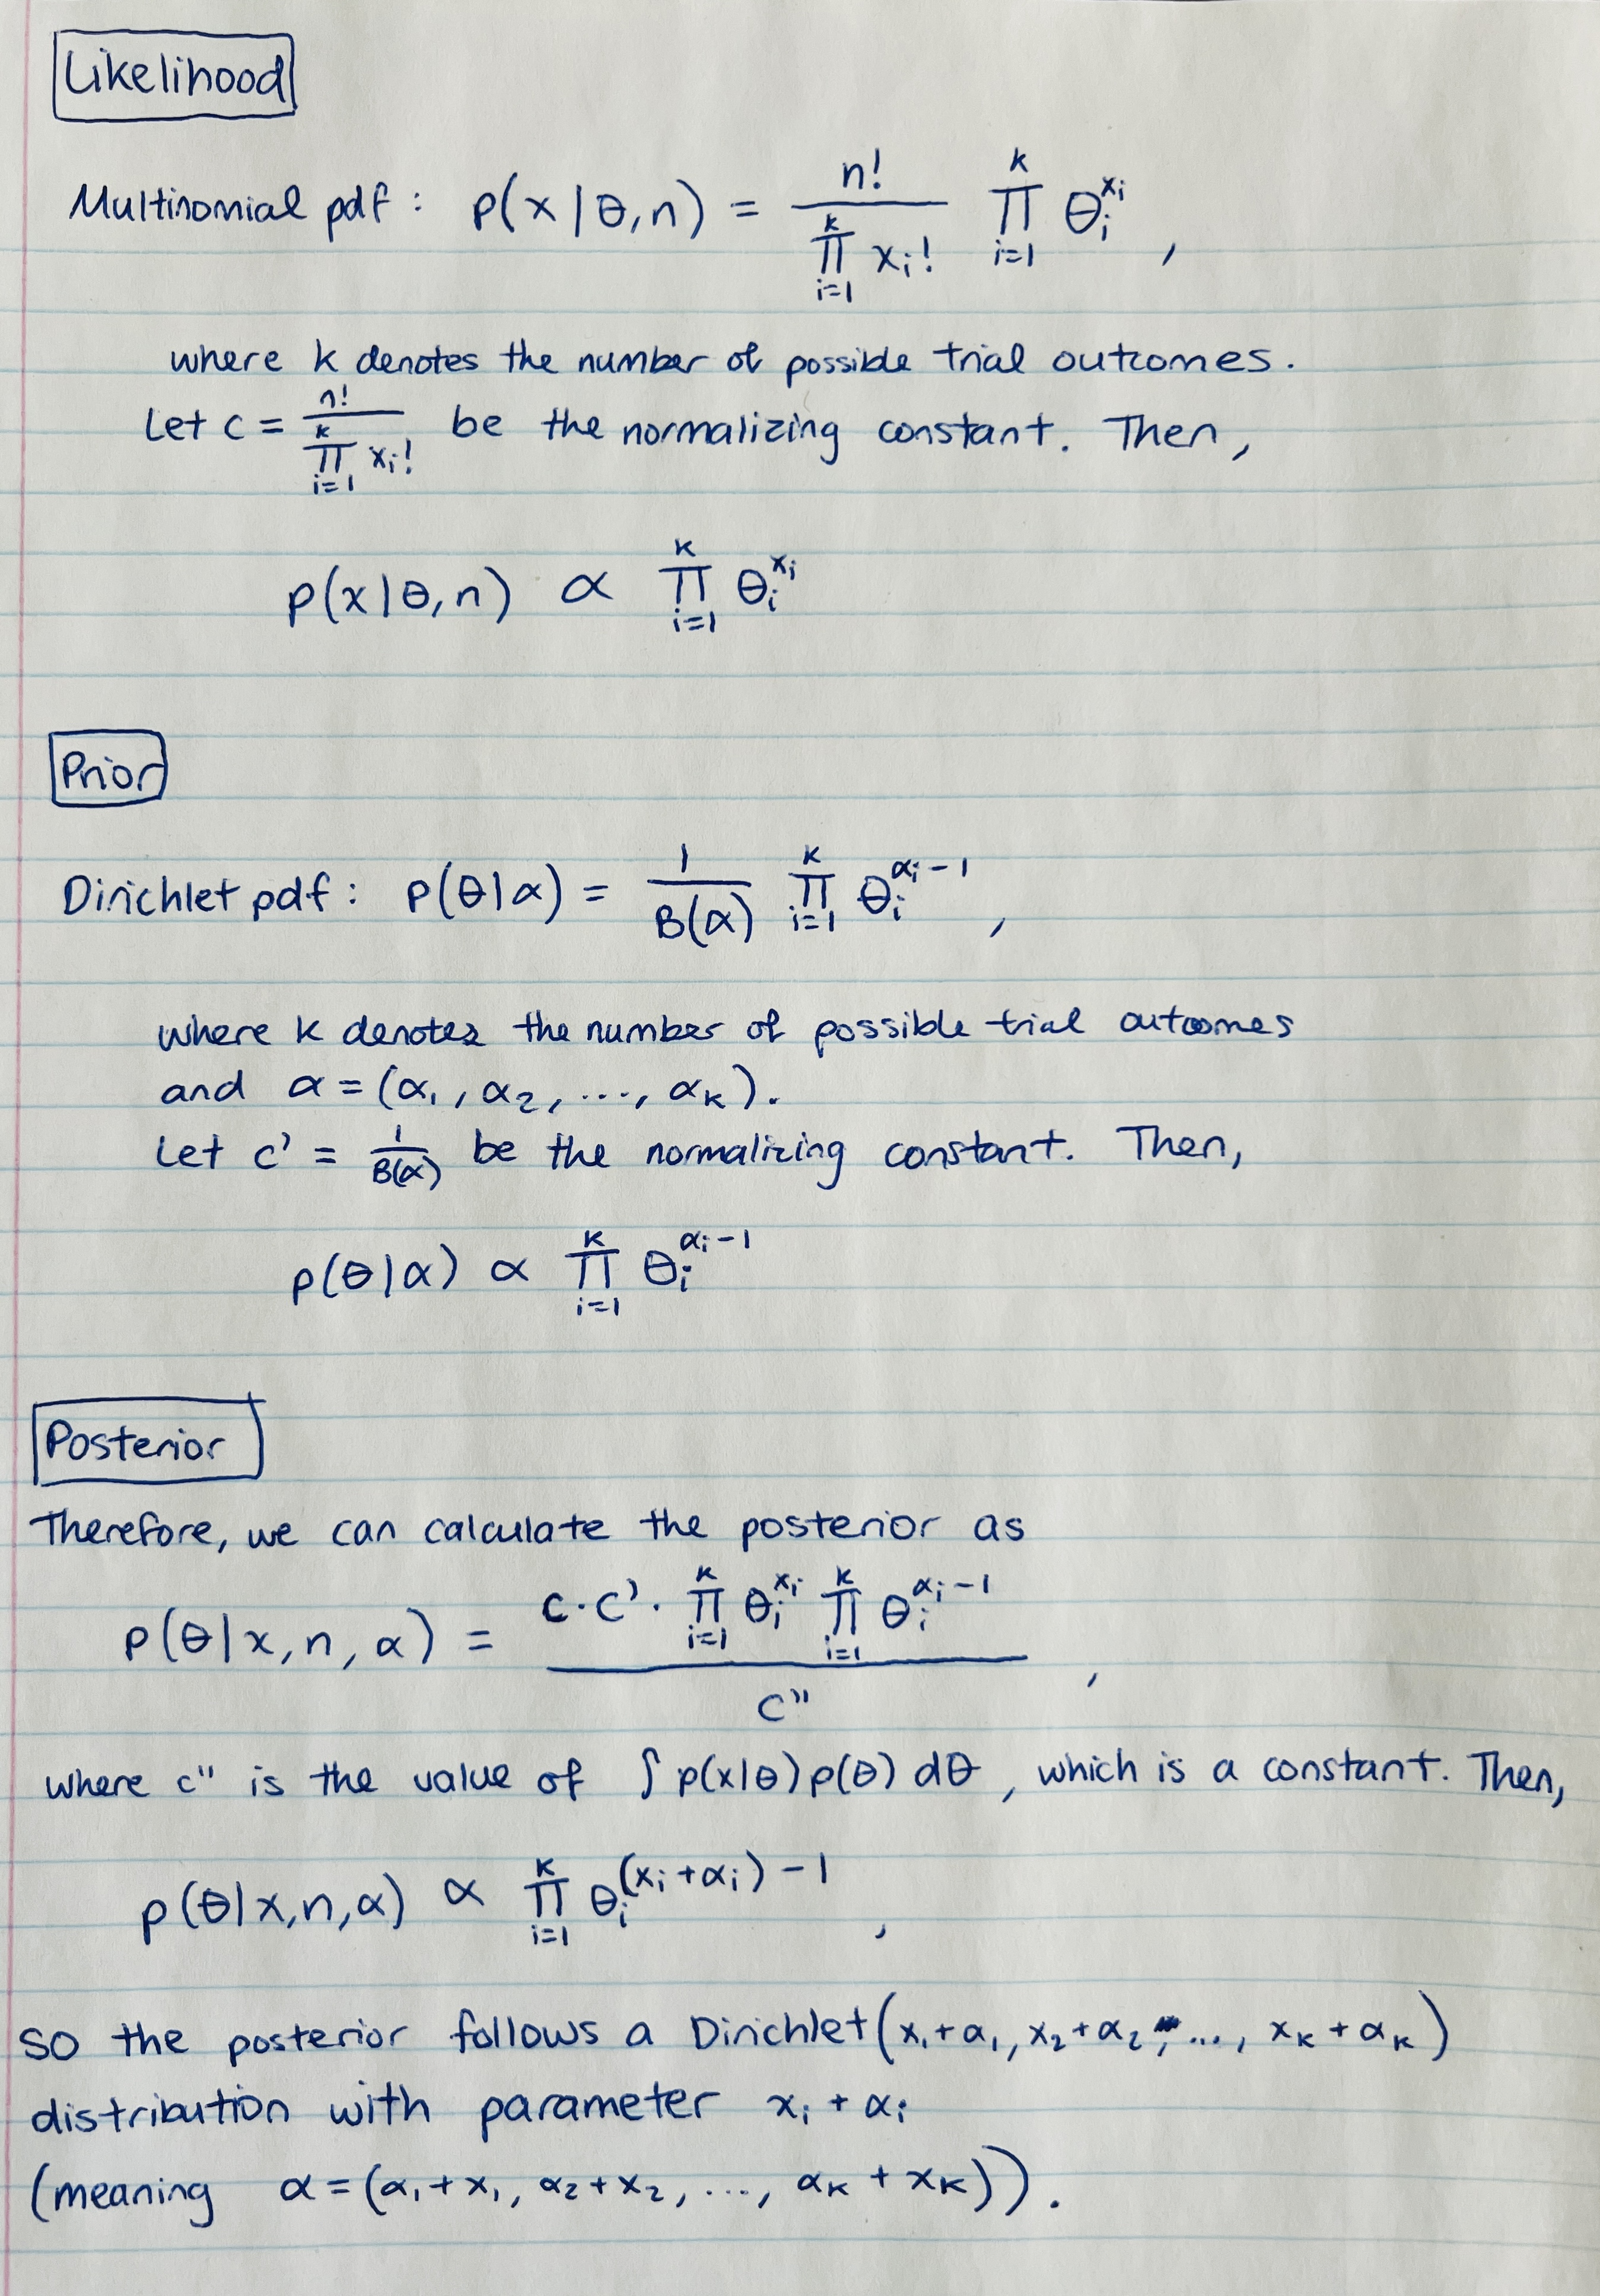

### Question 3

#### Multinomial Sample and Visualization:

For this multinomial distribution sample, I will let the number of trials be 1000 and choose the 3 categories to have probabilities 0.2, 0.3, and 0.5, respectively.

In [4]:
import numpy as np

probs = [0.2,0.3,0.5]
num_trials = 1000

sample = np.random.multinomial(num_trials, probs)

print(sample)

[198 298 504]


Therefore, during the 1000 trials of our sample, we observe the first outcome category 198 times, the second outcome category 298 times, and the third outcome category 504 times. 

To visualize this multinomial distribution and our sample, two bar plots are created below:

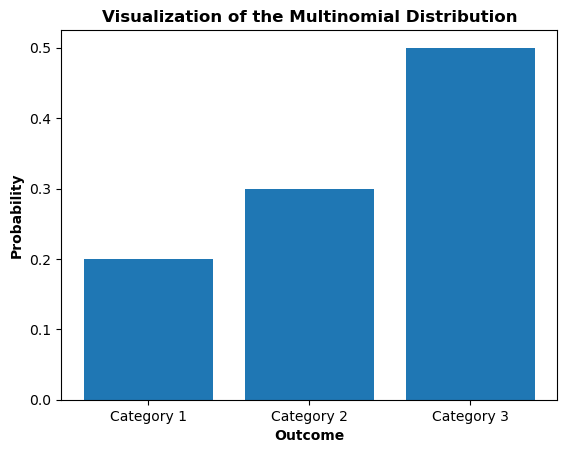

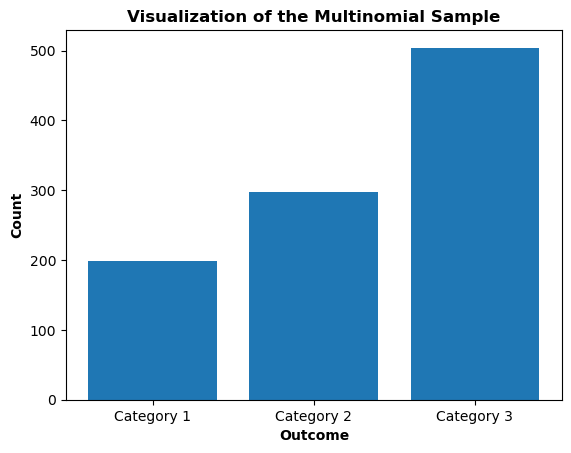

In [11]:
import matplotlib.pyplot as plt

outcome_categories = ['Category 1', 'Category 2', 'Category 3']

# Visualizing the distribution
plt.bar(categories, probs)
plt.xlabel('Outcome', fontweight='bold')
plt.ylabel('Probability', fontweight='bold')
plt.title('Visualization of the Multinomial Distribution', fontweight='bold')

plt.show()


# Visualizing our sample
plt.bar(categories, sample)
plt.xlabel('Outcome', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Visualization of the Multinomial Sample', fontweight='bold')

plt.show()

From the two bar plots above, we can see that the distribution of the multinomial distribution (which is equal to its pdf) is almost identical to the distribution of our sample.

#### Dirichlet Visualization:

Dirichlet Prior:

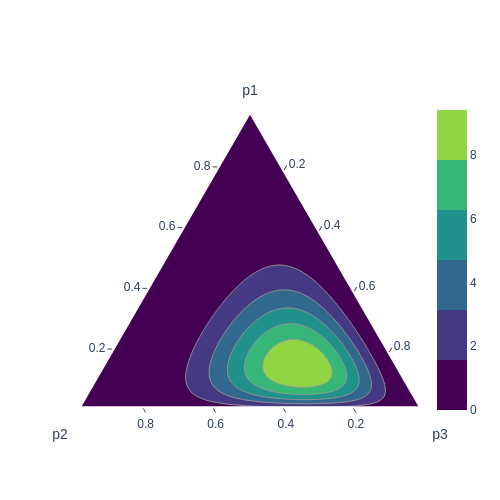

In [11]:
import numpy as np
from scipy import stats
import plotly.figure_factory as ff

# p1p2p3_scatter = stats.dirichlet(alpha=np.array([1.0, 1.0, 1.0])).rvs(size=100)
p1 = np.linspace(0,1,100)
p2 = 1-p1.copy()
p_ = np.linspace(0,1,100)
p1 = (p1[np.newaxis,:]*p_[:,np.newaxis]).flatten()
p2 = (p2[np.newaxis,:]*p_[:,np.newaxis]).flatten()
p3 = 1-p1-p2
p = np.c_[p1,p2,p3]

alpha_prior = np.array([2, 3, 5])  # Prior alpha values
dirichlet_prior = stats.dirichlet(alpha=alpha_prior)
dirichlet_prior_densities = dirichlet_prior.pdf(p.T)

# https://plotly.com/python/ternary-contour/Links to an external site. 
fig = ff.create_ternary_contour(p.T, dirichlet_prior.pdf(p.T),
                                pole_labels=['p1', 'p2', 'p3'],
                                interp_mode='cartesian',
                                showscale=True,
                                colorscale='Viridis')
fig.show('png')

Dirichlet Posterior:

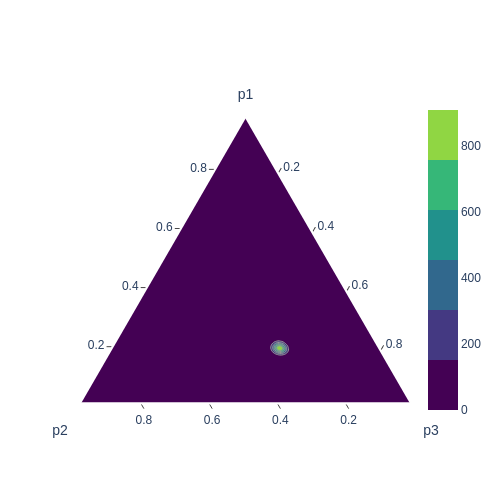

In [12]:
import numpy as np
from scipy import stats
import plotly.figure_factory as ff

# Step 1: define the Dirichlet prior (alpha) and observed counts from before
alpha_prior = np.array([2, 3, 5])  # Prior alpha values
observed_counts = np.array([198, 298, 504])  # observed counts for each category

# Step 2: compute the posterior alpha parameters
alpha_posterior = alpha_prior + observed_counts  # Posterior parameters

# Step 3: define the grid for the ternary plot
p1 = np.linspace(0, 1, 100)  # p1 values from 0 to 1
p2 = 1 - p1.copy()           # p2 is derived from p1
p_ = np.linspace(0, 1, 100)  # Extra points to create the grid

# create a grid of (p1, p2) pairs and calculate p3 as the remainder
p1 = (p1[np.newaxis, :] * p_[:, np.newaxis]).flatten()
p2 = (p2[np.newaxis, :] * p_[:, np.newaxis]).flatten()
p3 = 1 - p1 - p2  # p3 is the complement of p1 and p2
p = np.c_[p1, p2, p3]  # Stack p1, p2, and p3 into a grid

# step 4: create the Dirichlet posterior distribution with the updated alpha values
dirichlet_posterior = stats.dirichlet(alpha=alpha_posterior)

# compute the probability density for each (p1, p2, p3) point on the grid
dirichlet_posterior_densities = dirichlet_posterior.pdf(p.T)

#Create the ternary plot
fig = ff.create_ternary_contour(
    p.T, dirichlet_posterior_densities,  # Points and their densities
    pole_labels=['p1', 'p2', 'p3'],  # Labels for the axes
    interp_mode='cartesian',         # Interpolation mode for contours
    showscale=True,                  # Show color scale (density)
    colorscale='Viridis'             # Choose a color scale
)

fig.show('png')

The resulting Dirichlet posterior shows a very concentrated ternary plot, due to the large sample size of 1000 that was used.